## Problemas no-lineales

<img src="images/nonlinear.png">

Por esos motivos debemos de cierta forma linearlizar el problema.

Esto se puede hacer ya sea cambiando de parametrización ... 
describiendo el problema con otros parámetros o atacando el problema
linearizandolo localmente.

# Método de mínimos cuadrados no-lineales

Paso 1: Establece el problema en palabras claras
- ¿Cómo están relacionados los datos con el modelo?
- ¿Qué información previa es aplicable?

Paso 2: Organizar el problema en forma estándar

N-datos, M-parámetros del modelo, K-piezas de información.
La ecuación nolineal que relaciona los datos y los parámetros 

g(m) = d 

y, si es posible, la ecuación de información apriori 

Hm = h

Paso 3: Decide una solución de prueba razonable

Solución de prueba: m (iter=1) para iteración #1

Paso 4: Linealiza la ecuación de datos

$$
  \left\{\begin{array}{@{}l@{}}
    G^{(k)} \Delta m^{(k)} = \Delta d^{(k)} \\
    H \Delta m^{(k)} = \Delta h^{(k)}
        \end{array}\right.\,.
$$

sabiendo que

$$
G_{ij} = \frac{\partial g_i}{\partial m_j} \bigg|_{m^{(k)}}
$$

$$
\Delta d^{(k)} = d^{obs} - g(m^{(k)})
$$

y

$$
\Delta h^{(k)} = h^{pri} - Hm^{(k)}
$$

Paso 6: Mejora la solución actual iterando de la siguiente forma

$$
\Delta m^{(k)} = (G^{(k)T} G^{(k)})^{-1} G^{(k)T} \Delta d^{(k)}
$$
y
$$
m^{(k+1)} = m^{(k)} + \Delta m^{(k)}
$$
sin olvidar que $$G^{(k)}$$ debe recalcularse a cada nueva iteración $$k$$

Paso 8: Examine los resultados, sin olvidar que esto es sólo una aproximación.

## Ejemplo: Localización de sismos en 2D

In [1]:
# importar las librerias que vamos a usar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos la funcion 

# d = g(m)
# d = distancia_fuente-receptor / velocidad_de_propagación

# Cálculo del tiempo de viaje "traveltime"
def tiempo_de_viaje(xf, zf, xr, zr, vel):
    # estimación de tiempo de viaje a cada receptor
    distancia = np.sqrt((xf - xr)**2. + (zf - zr)**2.)
    tiempo = distancia / vel
    return tiempo

# Estimación del ajuste de los datos Norma L2
def ajuste_norma_l2(t_obs, t_cal):
    delta_time = []
    for i in range(len(t_obs)):
        delta_time.append(t_obs[i] - t_cal[i])
    delta_time = np.asarray(delta_time)
    ajuste = (1/2) * (np.matmul(delta_time.T, delta_time))
    return ajuste


In [5]:
# Datos de inicio

# Coordenadas reales de la fuente
xf = 0    #km
zf = 10   #km

#Coordenadas de los receptores
xr = [0, 1]
zr = [0, 0]

# Velocidad del medio
vel = 5    #km/s

# Tiempo de viaje observado
t_obs = [2, 2.009975124224178]#, 1.8867962264113207]

## Grid search

/tmp/ipykernel_9963/926913030.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


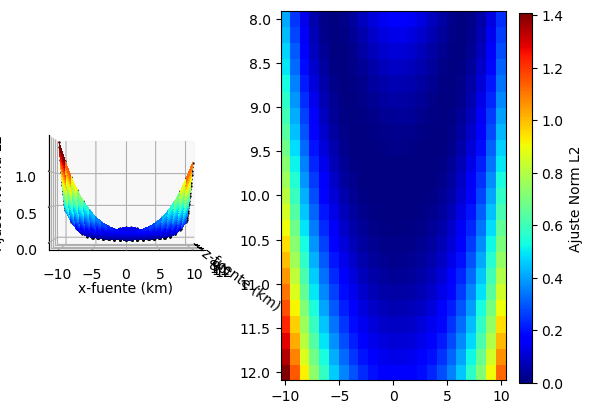

In [6]:
# Define el espacio de busqueda y el delta
xf = np.linspace(-10, 10, 23)
zf = np.linspace(12, 8, 23)

cost_map = np.zeros((len(zf), len(xf)), dtype=float)

costo = []
i = 0
k = 0
for x in xf:
    j = 0
    for z in zf:
        time = tiempo_de_viaje(x, z, xr, zr, vel)
        c = ajuste_norma_l2(t_obs, time)
        costo.append(c)
        if k == 1300:
            print(c,x,z)
        k+=1
        cost_map[j][i] = c
        j += 1
    i += 1
    
# Gráfica de los resultados
X, Z = np.meshgrid(xf, zf)

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1, projection='3d')
k = 0
for x in xf:
    for z in zf:
        ax1.scatter(z, x, costo[k], s=0.5, c='black')
        k += 1
s1 = ax1.plot_surface(Z, X, cost_map, cmap=plt.cm.jet,                   linewidth=0, antialiased=False)
ax1.set_zlabel('Ajuste Norma L2')
ax1.set_xlabel('z-fuente (km)')
ax1.set_ylabel('x-fuente (km)')
ax1.view_init(elev=0, azim=0, roll=0)

cmap = plt.cm.get_cmap('jet')
ax2 = fig1.add_subplot(1, 2, 2)
s2 = ax2.pcolor(xf, zf, cost_map, cmap=cmap)
ax2.set_ylim(ax2.get_ylim()[::-1])
cbaxes = fig1.add_axes([0.92, 0.105, 0.02, 0.77]) 
cb = fig1.colorbar(s2, ax=ax2, cax=cbaxes, orientation='vertical')
cb.set_label('Ajuste Norm L2')

## Método iterativo mínimos cuadrados

Paso 1:

Paso 2:

In [7]:
# Definimos la funcion 

# d = g(m)
# d = distancia_fuente-receptor / velocidad_de_propagación

# Cálculo del tiempo de viaje "traveltime"
def tiempo_de_viaje(xf, zf, xr, zr, vel):
    # estimación de tiempo de viaje a cada receptor
    distancia = np.sqrt((xf - xr)**2. + (zf - zr)**2.)
    tiempo = distancia / vel
    return tiempo

Paso 3: 

In [8]:
# Definimos m^k  de k=1  

m_k = np.asarray([1, 11])

Paso 4:

In [9]:
# Estimacion de las derivadas parciales, gradiente, frechet derivatives
def gradiente_tiempo_de_viaje(xf, zf, xr, zr, vel, delta):

    # Cálculo de derivadas parciales
    grad = np.zeros((len(xr), 2), dtype=float)
    
    for i in range(len(xr)):
        # centro
        t_c = tiempo_de_viaje(xf, zf, xr[i], zr[i], vel)
    
        # con respecto a X
        t_delta_x = tiempo_de_viaje(xf+delta, zf, xr[i], zr[i], vel)
        #print(t_delta_x, t_c)
        derivada_x = (t_delta_x - t_c) / delta 
        # con respecto a Z
        t_delta_z = tiempo_de_viaje(xf, zf+delta, xr[i], zr[i], vel)
        #print(t_delta_z, t_c)
        derivada_z = (t_delta_z - t_c) / delta 
        grad[i][0] = derivada_x
        grad[i][1] = derivada_z

    return grad

# Estimación del ajuste de los datos Norma L2
def delta_d(t_obs, t_cal):
    del_d = np.zeros((len(t_cal), 1), dtype=float)
    for i in range(len(t_cal)):
        del_d[i] = t_obs[i] - t_cal[i]
    return del_d


Paso 6:

In [21]:
delta_dist = 0.1  # km

xr = [0, 1]#, 8]
zr = [0, 0]#, 5]
#xr = [0, 5]
#zr = [0, 0]

t_obs = [2., 2.009975124224178]#, 1.8867962264113207]


m_k = np.asarray([-3, 25])
m_k = m_k.T
print(m_k,'k=',0)
costo = []
m_i = []
c = 1
k = 0
while c > 0.00001:
    # Calcula G
    grad_k = gradiente_tiempo_de_viaje(m_k[0], m_k[1], xr, zr, vel, delta_dist)
    #print(grad_k)
    # Calcula delta d
    t_cal = np.zeros((len(xr), 1), dtype=float)
    for i in range(len(xr)):
        t_cal[i] = tiempo_de_viaje(m_k[0], m_k[1], xr[i], zr[i], vel)
    del_d = delta_d(t_obs, t_cal)

    # epsilon
    epsilon = 0.001
    I = np.eye(2)
    
    # Calcula delta m
    GTG = np.matmul(grad_k.T, grad_k)
    e2I = epsilon**2.*I
    GTGe2I = GTG + e2I
    GTGe2Iinv = np.linalg.inv(GTGe2I)
    GTd = np.matmul(grad_k.T, del_d)
    del_m = np.matmul(GTGe2Iinv, GTd)
    c = ajuste_norma_l2(t_obs, t_cal)
    
    # Guardamos información de cada iteración
    costo.append(c[0])
    m_i.append(np.copy(m_k))

    # Monitoreamos la evolución en cada iteración
    print(m_k, 'k = ', k, 'ajuste = ', c)

    # Actualizamos el modelo al siguiente paso
    m_k[0] = m_k[0] + del_m[0]
    m_k[1] = m_k[1] + del_m[1]
    k += 1

[-3 25] k= 0
[-3 25] k =  0 ajuste =  [[9.27055623]]
[ 1 10] k =  1 ajuste =  [[9.95031033e-05]]
[ 0 10] k =  2 ajuste =  [[0.]]


/tmp/ipykernel_9963/3921202803.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax1.scatter(m_i[s_i][0], m_i[s_i][1], 80, marker='x', color='red', edgecolor='black')


[-3 25]
[ 1 10]
[ 0 10]


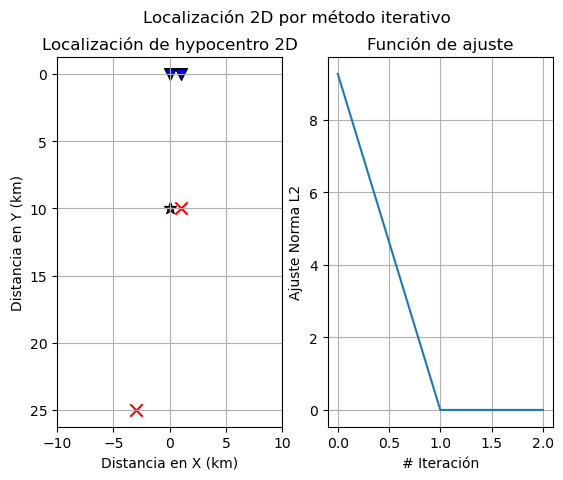

In [24]:
# Grafiquemos los resultados
fig2 = plt.figure(2)

fig2.suptitle('Localización 2D por método iterativo')

ax1 = fig2.add_subplot(1,2,1)
ax1.set_title('Localización de hypocentro 2D')
ax1.set_xlabel('Distancia en X (km)')
ax1.set_ylabel('Distancia en Y (km)')
# Graficando receptores
for r_i in range(len(xr)):
    ax1.scatter(xr[r_i], zr[r_i], 70, marker='v', color='blue', edgecolor='black')
# Graficando el historico de las localizaciones
for s_i in range(len(costo)):
    if s_i < len(costo)-1:
        ax1.scatter(m_i[s_i][0], m_i[s_i][1], 80, marker='x', color='red', edgecolor='black')
        print(m_i[s_i])
    else:
        ax1.scatter(m_i[s_i][0], m_i[s_i][1], 80, marker='*', color='red', edgecolor='black')
        print(m_i[s_i])

# Labels
ax1.grid()
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlim([-10,10])

# Graficando el histórico del ajuste
ax2 = fig2.add_subplot(1,2,2)
ax2.set_title('Función de ajuste')
iteracion = np.linspace(0, len(m_i)-1, len(m_i))
ax2.plot(iteracion, costo)
# labels
ax2.set_xlabel('# Iteración')
ax2.set_ylabel('Ajuste Norma L2')
ax2.grid()


In [2]:
# Algunas funciones que se van a necesitar

# Cálculo del tiempo de viaje "traveltime"
def tiempo_de_viaje(xf, zf, xr, zr, vel):
    tiempo = []
    for i in range(len(xr)):
        distancia = np.sqrt((xr[i] - xf)**2. + (zr[i] - zf)**2.)
        tiempo.append(distancia / vel)
    tiempo = np.asarray(tiempo)
    return tiempo

# Estimacion de las derivadas parciales, gradiente, frechet derivatives
def gradiente_tiempo_de_viaje(xf, zf, xr, zr, vel, delta):

    # Cálculo de derivadas parciales
    
    # con respecto a X
    t_delta_x = tiempo_de_viaje(xf+delta, zf, xr, zr, vel)
    t_x = tiempo_de_viaje(xf, zf, xr, zr, vel)
    derivada_x = (t_delta_x - t_x) / delta 
    # con respecto a Z
    t_delta_z = tiempo_de_viaje(xf, zf+delta, xr, zr, vel)
    t_z = tiempo_de_viaje(xf, zf, xr, zr, vel)
    derivada_z = (t_delta_z - t_z) / delta 

    # agrupamos derivadas
    gradiente = np.asarray([derivada_x, derivada_z])
    return gradiente

# Estimación del ajuste de los datos Norma L2
def ajuste_norma_l2(t_obs, t_cal):
    delta_time = []
    for i in range(len(t_obs)):
        delta_time.append(t_obs[i] - t_cal[i])
    delta_time = np.asarray(delta_time)
    ajuste = (1/2) * (np.matmul(delta_time.T, delta_time))
    return ajuste



In [138]:
print(del_m)

[[0.00555507]
 [0.99994414]]


In [169]:
dist = np.sqrt((0-0)**2 + (9-0)**2)
tobs = dist/5
print(2-tobs)
dist = np.sqrt((0-1)**2 + (9-0)**2)
tobs = dist/5
print(2.009975124224178-tobs)

print(tobs-tcal)


0.19999999999999996
0.19889809659669444
0.0


In [165]:
9/5

1.8